# Dokumentacja wstępna 

## Filtr wykrywający krawędzie w wideo, w czasie rzeczywistym.

Funkcjonalność projektu:

- Poprawnie negocjuje parametry transmisji interfejsem HDMI.
- Odbiera strumień wideo z innego urządzenia.
- Wykonuje operacje wykrywania krawędzi w odebranym obrazie.
- Nanosi wykryte krawędzie na obraz wyjściowy.
- Nadaje strumień wideo na wyjście HDMI.

Projekt wykonywany na sprzęcie własnym. Na płytce [Nexys Video] z układem FPGA Xilinx Artix-7 XC7A200T-1SBG484C. Płytka jest wyposażona w potrzebne złącza wejście  HDMI i wyjście HDMI.

[Nexys Video]: https://reference.digilentinc.com/reference/programmable-logic/nexys-video/reference-manual?fbclid=IwAR33quUNPj1-sevbe4yfgbg7NtRSuu5IIi0UPC7HwtIQmubVyf3x_IuBAcM

## Analiza techniczna elementów systemu

### Interfejsy:

- wejście HDMI
- wyjście HDMI

### Algorytmy:

Algorytm Canny'ego do detekcji krawędzi dzieli się na pięć części.

- Redukcja koloru
- Redukcja szumu
- Obliczenie gradientu
- Tłumienie
- Podwójny próg
- Śledzenie krawędzi przez histerezę

#### Redukcja szumu

In [638]:
import numpy as np
import math
import scipy.signal
from matplotlib import pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

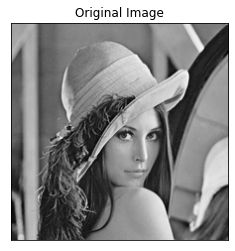

In [639]:
img = cv2.imread('lena.png',0)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

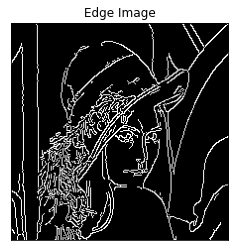

In [640]:
edges = cv2.Canny(img, 50,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

In [641]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

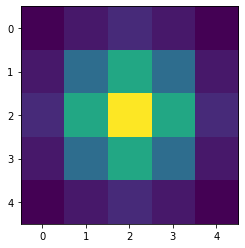

In [642]:
plt.imshow(gaussian_kernel(5))

> Odpowiedź filtru gaussa

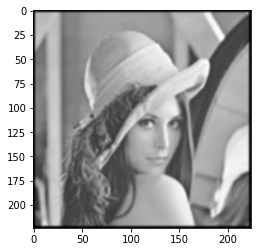

In [643]:
plt.imshow(scipy.signal.convolve2d(img,gaussian_kernel(5)), cmap='gray')

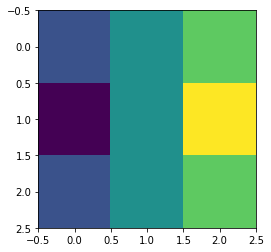

In [644]:
sobelKx = np.array([[-1,0,1],[-2,0,2], [-1,0,1]])
plt.imshow(sobelKx)

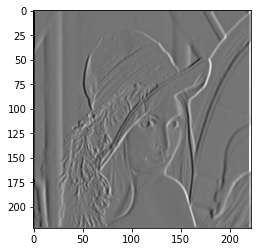

In [645]:
Ix = scipy.signal.convolve2d(img,sobelKx)
plt.imshow(Ix, cmap='gray')

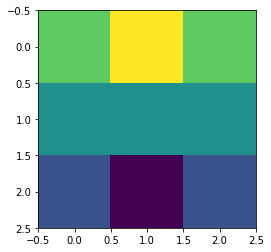

In [646]:
sobelKy = np.array([[1,2,1],[0,0,0], [-1,-2,-1]])
plt.imshow(sobelKy)

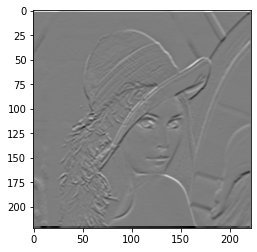

In [647]:
Iy = scipy.signal.convolve2d(img,sobelKy)
plt.imshow(Iy, cmap='gray')

[[ 69 154 195 ... 197 150  63]
 [154 206 194 ... 202 212 143]
 [195 194   1 ...  56 200 166]
 ...
 [ 65  71   6 ...  28 127 128]
 [ 49  73  69 ... 124 138 105]
 [ 21  51  68 ... 132 107  48]]


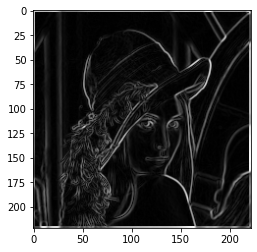

In [648]:
G = np.hypot(Ix, Iy)
G = G / G.max() * 255
plt.imshow(G, cmap='gray')
G = G.astype('uint8')
print(G)

In [649]:
theta = np.arctan2(Iy, Ix)

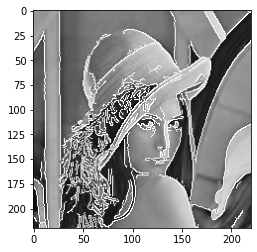

In [650]:
plt.imshow(np.maximum(img,edges), cmap='gray')

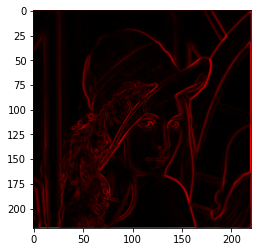

In [651]:
zero = np.zeros((220,220))
color_G = np.stack((G[1:221,1:221],zero , zero), axis=2).astype('uint8')
color_img = np.stack((img,img,img), axis=2)
plt.imshow(color_G)

In [652]:
color_G.shape

(220, 220, 3)

(-0.5, 219.5, 219.5, -0.5)

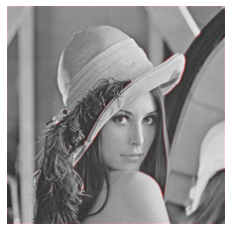

In [653]:
plt.imshow(np.maximum(color_G,color_img))
plt.axis("off")

## Status prac

W powijakach